In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.backends.backend_pdf as pdf_backend
import subprocess

from pdf2image import convert_from_path

import os

# Questão 1

In [3]:
Vf = 7000
Vo = 2362
n=2050-2020

i = (Vf/Vo)**(1/n)-1
print(i*100,'de consumo')

3.6877072798250143 de consumo


In [4]:
Vf = 34000
Vo = 17270
n=2050-2020

i = (Vf/Vo)**(1/n)-1
print(i*100,'de PIB')

2.2836504363326293 de PIB


Grafico - Consumo

In [5]:
Ef = 7000
Eo = 2362
tf=2050

alphE = np.log(Ef/Eo)/(tf-2022)
print(alphE,'de consumo')

0.03880005111714796 de consumo


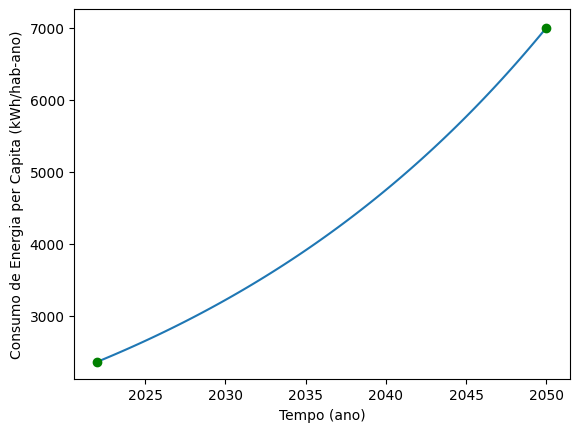

In [6]:
t = np.linspace(2022,2050.1,100)
E = Eo * np.exp(alphE*(t-2022))

plt.plot(t,E, '-')
plt.plot(2022,Eo,'o',color='green')
plt.plot(2050,Ef,'o',color='green')

plt.xlabel('Tempo (ano)')
plt.ylabel('Consumo de Energia per Capita (kWh/hab-ano)')

plt.savefig('Graf-Consumo.png',dpi=300,transparent=True)

Grafico - PIB

In [47]:
print(PIB_B[data_B==2022])

[8933.4]


In [52]:
Pf = 34000
Po = 17270
tf=2050

alphP = np.log(Pf/Po)/(tf-2022)
print(alphP,'de PIB')

0.02419248687348479 de PIB


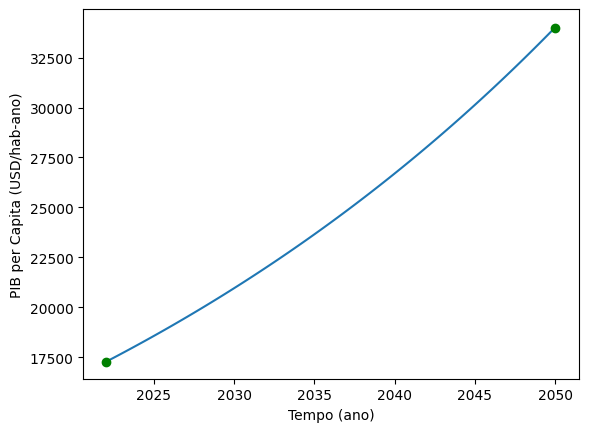

In [53]:
t = np.linspace(2022,2050.1,100)
P = Po * np.exp(alphP*(t-2022))

plt.plot(t,P, '-')
plt.plot(2022,Po,'o',color='green')
plt.plot(2050,Pf,'o',color='green')

plt.xlabel('Tempo (ano)')
plt.ylabel('PIB per Capita (USD/hab-ano)')

plt.savefig('Graf-PIB.png',dpi=300,transparent=True)

Graficos juntos

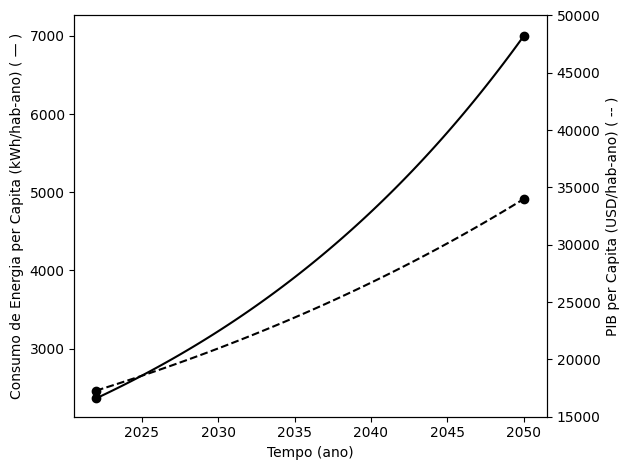

In [54]:
fig, ax1 = plt.subplots()

# Plot energy consumption with a continuous line
ax1.plot(t, E, '-', color='black', label='Consumo de Energia')
ax1.plot(2022, Eo, 'o', color='black')
ax1.plot(2050, Ef, 'o', color='black')
ax1.set_xlabel('Tempo (ano)')
ax1.set_ylabel('Consumo de Energia per Capita (kWh/hab-ano) ( — )', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for GDP per capita with a dotted line
ax2 = ax1.twinx()
ax2.plot(t, P, '--', color='black', label='PIB per Capita')
ax2.plot(2022, Po, 'o', color='black')
ax2.plot(2050, Pf, 'o', color='black')
ax2.set_ylabel('PIB per Capita (USD/hab-ano) ( -- )', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(15000,50000)
# Combine legends from both plots
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

fig.tight_layout()  # Adjust layout to prevent overlap

# Save the figure
plt.savefig('Graf-Consumo-PIB.png', dpi=300, transparent=True)
plt.show()


# Questão 2

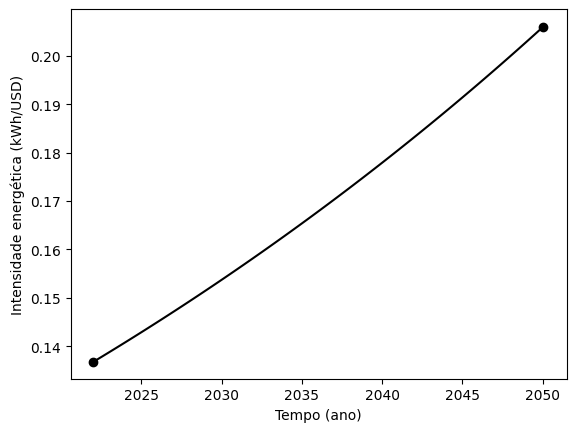

In [55]:
plt.plot(t,E/P, '-', color='black')
plt.plot(2022,Eo/Po,'o',color='black')
plt.plot(2050,Ef/Pf,'o',color='black')

plt.xlabel('Tempo (ano)')
plt.ylabel('Intensidade energética (kWh/USD)')

plt.savefig('Graf-I.png',dpi=300,transparent=True)

**Mas isso não parece completo**

Então, fui na internet pesquisar por mais dados para ter algo mais completo

PIB per Capita http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38375

Consumo https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/anuario-estatistico-de-energia-eletrica (relatorio 2022 - 3.63)

In [19]:
data = pd.read_csv('PIB_Brasil.txt',sep=';')

PIB_B = data['PIB per capita'].values
PIB_B = PIB_B*1000*0.18

PIB_B = np.append(PIB_B,34000)

data_B = data['Data'].values
data_B = np.append(data_B,2050)

Consumo_B = np.array([2250,2306,2344,2246,2242,2250,2273,2289,2242,2324,2362,7000])
ano_B = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2050])

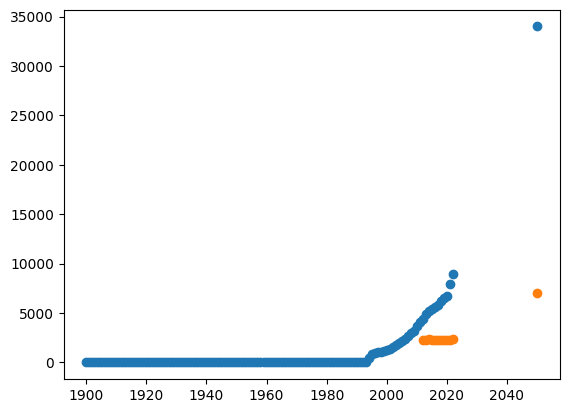

In [32]:
plt.plot(data_B,PIB_B, 'o')

plt.plot(ano_B,Consumo_B, 'o')

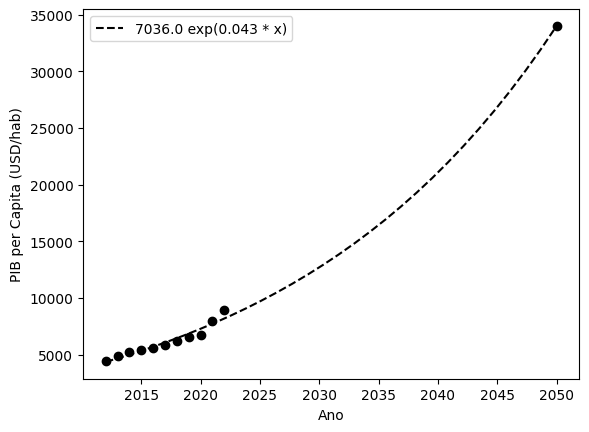

In [57]:
# Define the fitting function
def F(x, A, B,C):
    return B * np.exp(A * (x-2012))+C

# Plot the original data points
plt.plot(data_B[data_B>=2012], PIB_B[data_B>=2012], 'o', color='black')

# Fit the curve
popt, d = curve_fit(F, data_B[data_B>=2012], PIB_B[data_B>=2012])

# Generate points for the fitted curve
ii = np.linspace(2012, 2050, 30)
plt.plot(ii, F(ii, *popt), '--', color='black', label=f'{round(popt[1], 0)} exp({round(popt[0], 3)} * x)')

# Add labels and legend
plt.xlabel('Ano')
plt.ylabel('PIB per Capita (USD/hab)')
plt.legend()

# Show the plot
plt.savefig('PIB_B.png',dpi=300,transparent=True)

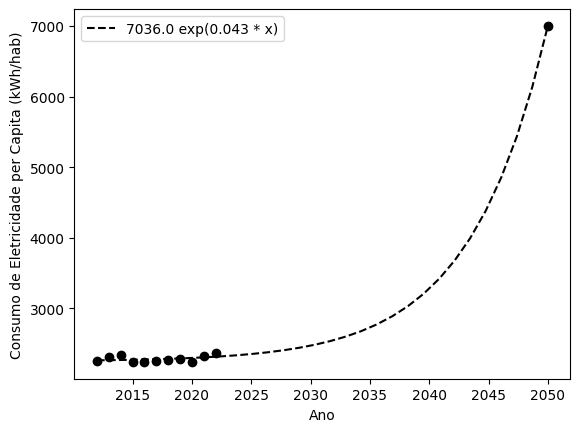

In [58]:
# Define the fitting function
def F2(x, A, B,C):
    return B * np.exp(A * (x-2012))+C

# Plot the original data points
plt.plot(ano_B, Consumo_B, 'o', color='black')

# Fit the curve
popt2, d = curve_fit(F2, ano_B, Consumo_B)

# Generate points for the fitted curve

plt.plot(ii, F2(ii, *popt2), '--', color='black', label=f'{round(popt[1], 0)} exp({round(popt[0], 3)} * x)')

# Add labels and legend
plt.xlabel('Ano')
plt.ylabel('Consumo de Eletricidade per Capita (kWh/hab)')
plt.legend()

# Show the plot
plt.savefig('Consumo_B.png',dpi=300,transparent=True)

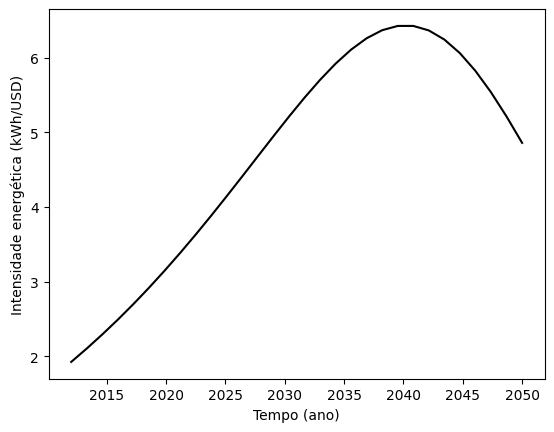

In [46]:
plt.plot(ii,F(ii,*popt)/F2(ii,*popt2), color= 'black')


plt.xlabel('Tempo (ano)')
plt.ylabel('Intensidade energética (kWh/USD)')

plt.savefig('Graf-II.png',dpi=300,transparent=True)

# Questão 4

In [2]:
#IMportar dados
data = pd.read_csv('ConsumoEletrica.txt',sep=',')
local = data['ISO3'].values
Consumo = data['Electricity consumption/population'].values

data = pd.read_csv('HDI.txt',sep=',')
local2 = data['country'].values
IDH = data['Hdi2022'].values

#Separar

#Siglas dos paises que desejo
sigla = [
    'ARG', 'BRA', 'MOZ', 'NGA', 'DZA', 'EGY', 'HND', 'CRI', 'FRA', 'PRT', 'ESP',
    'DEU', 'RUS', 'USA', 'CAN', 'CHN', 'JPN', 'IND', 'KOR', 'IDN'
]


# Paises que desejo
pais = [
    'Argentina', 'Brazil', 'Mozambique', 'Nigeria', 'Algeria', 'Egypt', 
    'Honduras', 'Costa Rica', 'France', 'Portugal', 'Spain',
    'Germany', 'Russia', 'USA', 'Canada', 'China', 'Japan', 'India', 
    'South Korea', 'Indonesia'
]


ConsumoPais = []
ConsumoE = []

for i in range(len(local)):
    si = local[i]
    for j in range(len(sigla)):
        if str(si) == sigla[j]:
            ConsumoPais.append(pais[j])
            ConsumoE.append(Consumo[i])


IDHPais = []
IDHp = []

for i in range(len(local2)):
    si = local2[i]
    for j in range(len(pais)):
        if str(si) == pais[j]:
            IDHPais.append(pais[j])
            IDHp.append(IDH[i])



In [3]:
#Agora colocar tudo em ordem
Consumo,IDH = [],[]
for i in range(len(pais)):

    for j in range(len(IDHPais)):
        if pais[i] == IDHPais[j]:
            IDH.append(IDHp[j])

    for j in range(len(ConsumoPais)):
        if pais[i] == ConsumoPais[j]:
            Consumo.append(ConsumoE[j])

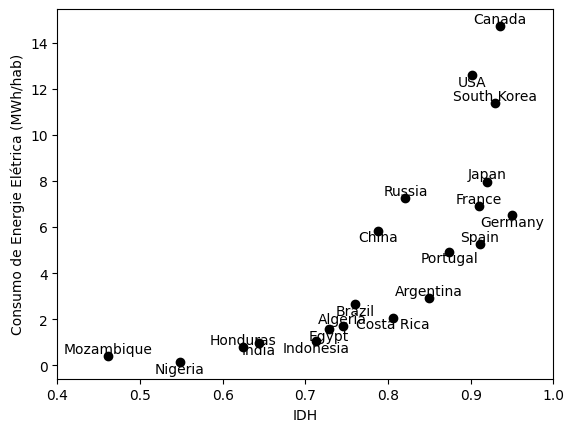

In [4]:
plt.plot(IDH,Consumo,'o',color='black')
# Add text labels for each point
pos = []
for i in range(len(pais)):
    if i%2==0:
        pos.append('bottom')
    else:
        pos.append('top')
for i in range(len(pais)):
    plt.text(IDH[i], Consumo[i], pais[i], fontsize=10, va=pos[i],ha='center')

plt.xlabel('IDH')
plt.ylabel('Consumo de Energie Elétrica (MWh/hab)')

plt.xlim(0.4,1.0)

plt.savefig('ConsumoVSIDH.png',dpi=300,transparent=True)

In [82]:
# Get the indices that would sort the 'values' list
Arrumado_indices = np.argsort(IDH)

# Sort 'values' based on these indices
Arrumado_IDH = [IDH[i] for i in Arrumado_indices]

# Reorder 'labels' based on the sorted indices
Arrumado_Consumo = [Consumo[i] for i in Arrumado_indices]


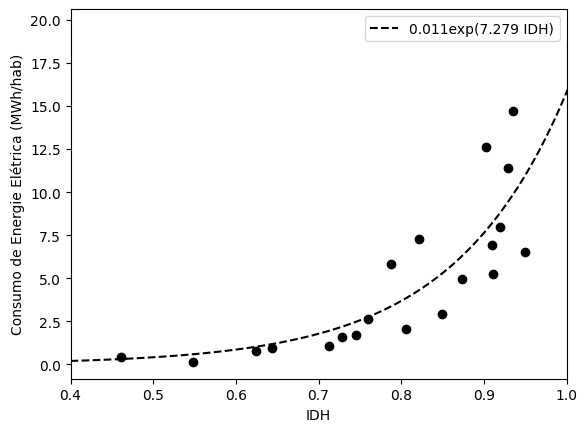

In [89]:
def F(x,A,B):
    return B*np.exp(A*x)

plt.plot(Arrumado_IDH,Arrumado_Consumo,'o',color='black')

popt,d = curve_fit(F,Arrumado_IDH,Arrumado_Consumo)

ii = np.linspace(0.4,1.03,100)
plt.plot(ii, F(ii,*popt) , '--', color='black',label=f'{round(popt[1],3)}exp({round(popt[0],3)} IDH)')

plt.xlabel('IDH')
plt.ylabel('Consumo de Energie Elétrica (MWh/hab)')

plt.xlim(0.4,1.0)
plt.legend()

plt.savefig('Ajuste-ConsumoVSIDH.png',dpi=300,transparent=True)


Fazer tabela

In [5]:
texto = r"""
\documentclass{article}
\usepackage{graphicx}
\begin{document}
\begin{table}[h!]
\centering
\begin{tabular}{c|c|c}
\hline
Pais & IDH & Consumo de Energia Elétrica (MWh/hab) \\
\hline
"""
for i in range(len(pais)):
    texto+= f"{pais[i]} & {IDH[i]} & {Consumo[i]} \\\ \hline\n "



texto += r"""\hline
\end{tabular}
\caption{Sample Table}
\end{table}
\end{document}
"""
print(texto)


\documentclass{article}
\usepackage{graphicx}
\begin{document}
\begin{table}[h!]
\centering
\begin{tabular}{c|c|c}
\hline
Pais 1 & IDH 2 & Consumo de Energia Elétrica (MWh/hab) 3 \\
\hline
Argentina & 0.849 & 2.911 \\ \hline
 Brazil & 0.76 & 2.663 \\ \hline
 Mozambique & 0.461 & 0.404 \\ \hline
 Nigeria & 0.548 & 0.144 \\ \hline
 Algeria & 0.745 & 1.704 \\ \hline
 Egypt & 0.728 & 1.575 \\ \hline
 Honduras & 0.624 & 0.781 \\ \hline
 Costa Rica & 0.806 & 2.07 \\ \hline
 France & 0.91 & 6.908 \\ \hline
 Portugal & 0.874 & 4.935 \\ \hline
 Spain & 0.911 & 5.249 \\ \hline
 Germany & 0.95 & 6.529 \\ \hline
 Russia & 0.821 & 7.252 \\ \hline
 USA & 0.902 & 12.613 \\ \hline
 Canada & 0.935 & 14.737 \\ \hline
 China & 0.788 & 5.848 \\ \hline
 Japan & 0.92 & 7.975 \\ \hline
 India & 0.644 & 0.956 \\ \hline
 South Korea & 0.929 & 11.402 \\ \hline
 Indonesia & 0.713 & 1.04 \\ \hline
 \hline
\end{tabular}
\caption{Sample Table}
\end{table}
\end{document}



In [ ]:
latex_code =  r"""
\documentclass{article}
\usepackage{graphicx}
\begin{document}
\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|}
\hline
Header 1 & Header 2 & Header 3 \\
\hline
Row 1 Col 1 & Row 1 Col 2 & Row 1 Col 3 \\
Row 2 Col 1 & Row 2 Col 2 & Row 2 Col 3 \\
Row 3 Col 1 & Row 3 Col 2 & Row 3 Col 3 \\
\hline
\end{tabular}
\caption{Sample Table}
\end{table}
\end{document}
"""

In [6]:


# Define LaTeX code for the table
latex_code = texto

# Save LaTeX code to a .tex file
with open("table.tex", "w") as file:
    file.write(latex_code)

# Compile the LaTeX file to PDF
subprocess.run(["pdflatex", "table.tex"])

# Convert PDF to PNG using matplotlib
# Use 'pdf2image' or similar tools for better results


# Convert the PDF to images
pages = convert_from_path('table.pdf', 300)

# Save the first page as PNG
for i, page in enumerate(pages):
    page.save(f'table_{i}.png', 'PNG')

print("Table saved as PNG.")

# Clean up intermediate files

os.remove("table.tex")
os.remove("table.pdf")
os.remove("table.log")
os.remove("table.aux")
